#importing libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


#resampling library
from imblearn.over_sampling import SMOTE

#feature scaling library
from sklearn.preprocessing import StandardScaler

#libtune to tune model, get different metric score
from collections import Counter
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
%matplotlib inline


#Data loading and overview

In [45]:
data = pd.read_csv('Car_Insurance_Claim.csv')

In [46]:
#shape of the dataset
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.') 

The dataset has 10000 rows and 19 columns.


In [47]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  int64  
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  int64  
 11  CHILDREN             10000 non-null  int64  
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [7]:
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


#Exploratory Data Analysis

1.missing data

In [8]:
print(f'There are {data.isnull().any().sum()} columns in car insurance dataset with missing values.')

There are 2 columns in car insurance dataset with missing values.


In [9]:
print(f'The columns {data.columns[data.isna().any()].tolist()}  in car insurance dataset have missing values.')

The columns ['CREDIT_SCORE', 'ANNUAL_MILEAGE']  in car insurance dataset have missing values.


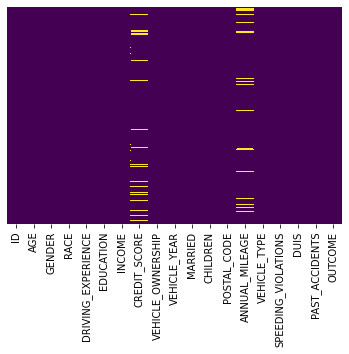

In [10]:
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')

2.data exploration

In [11]:
data['OUTCOME'].value_counts()

0    6867
1    3133
Name: OUTCOME, dtype: int64

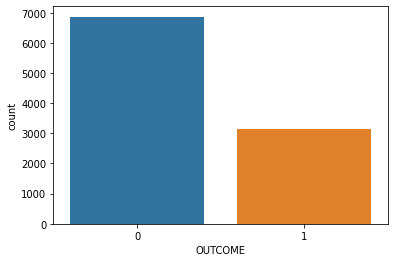

In [12]:
img= sns.countplot(data=data, x='OUTCOME')

plt.show(img)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b97fffe50>,
      dtype=object)

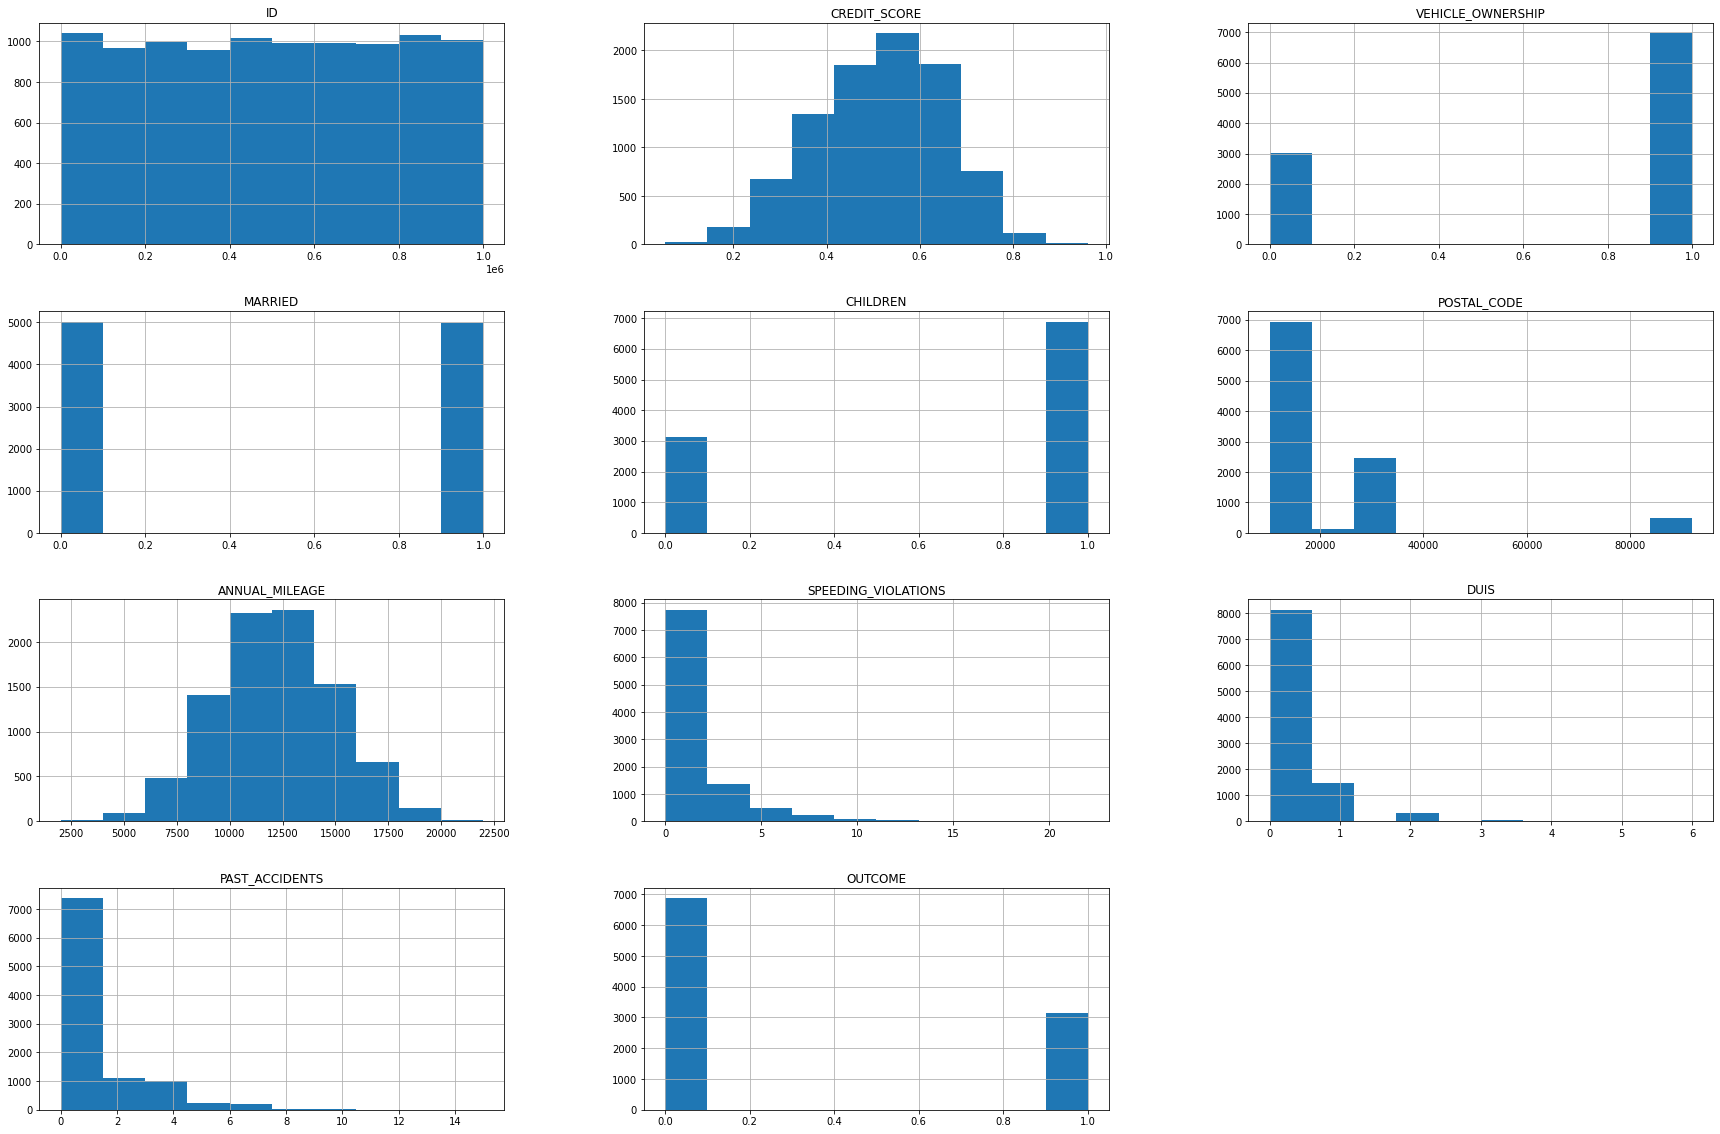

In [13]:
# Histogram 
data.hist(figsize=(30,20))

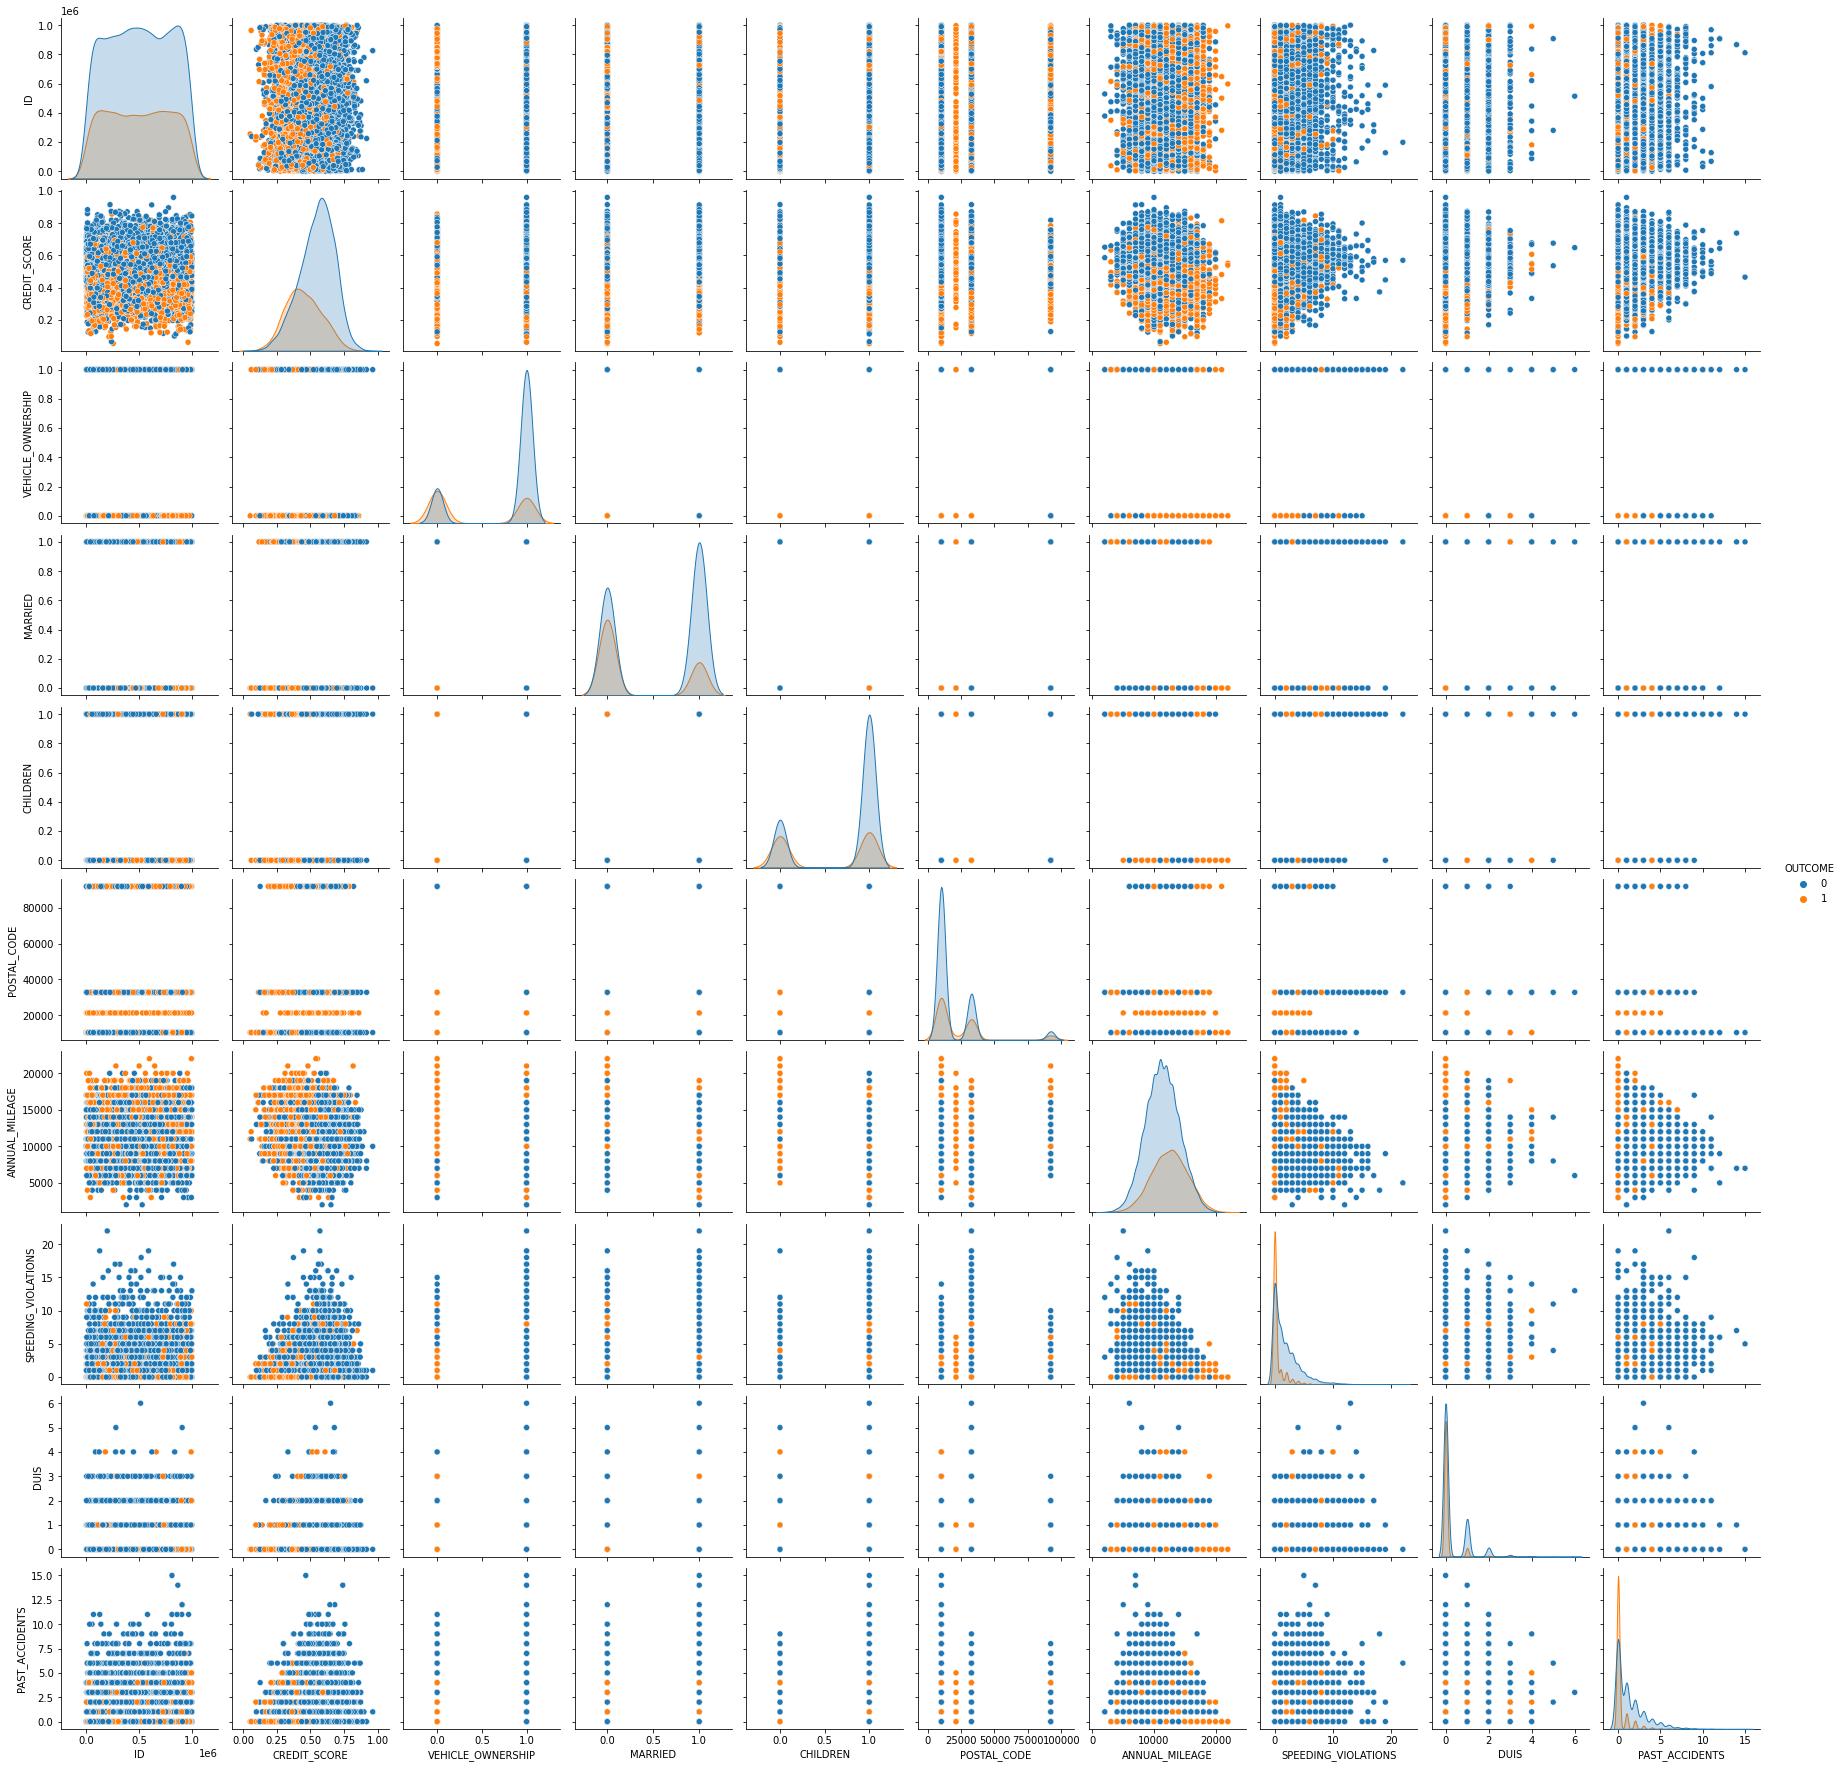

In [14]:
# pairploting
sns.pairplot(data, hue='OUTCOME');

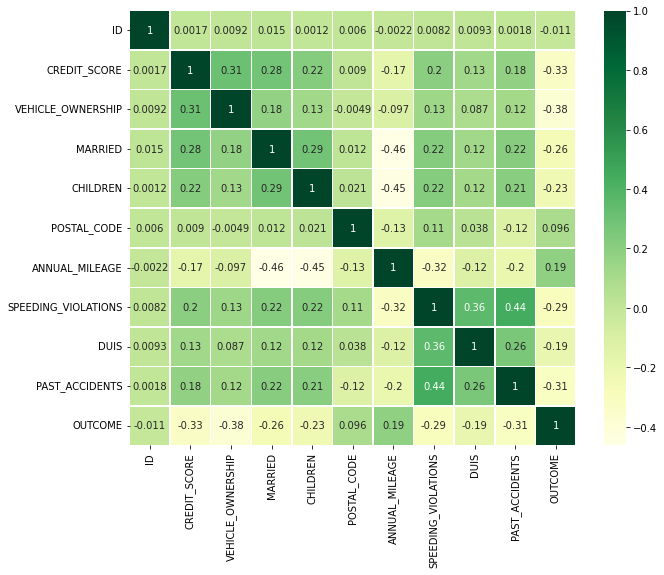

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True,linewidths=0.5, cmap="YlGn");

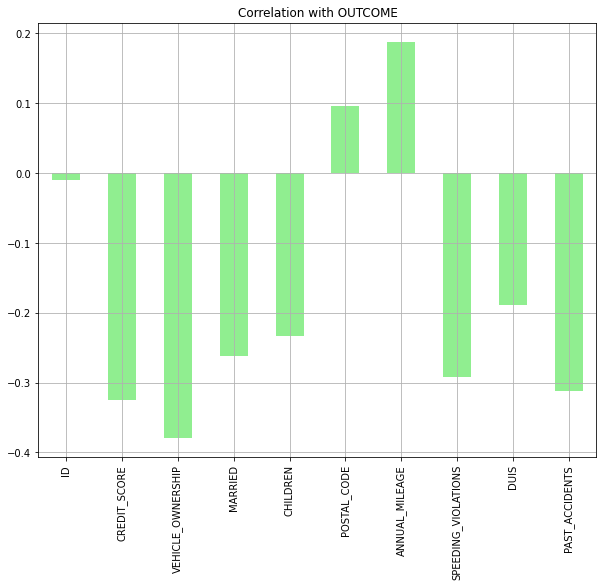

In [16]:
data.drop('OUTCOME', axis=1).corrwith(data.OUTCOME).plot(kind='bar', grid=True, figsize=(10, 8), title="Correlation with OUTCOME",color="lightgreen");

As you see, POSTAL_CODE, ID are the least correlated and  all other variables have a significant correlation with the OUTCOME variable.

Relationship Between Age vs OUTCOME:

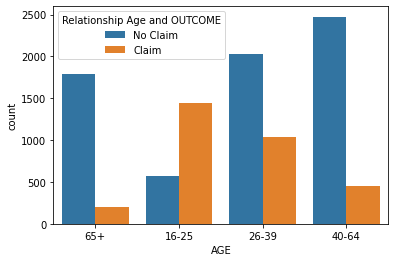

In [17]:
dfage = data.groupby(['AGE'])['OUTCOME'].value_counts()

img1= sns.countplot(data=data, x='AGE', hue='OUTCOME')
plt.legend(title='Relationship Age and OUTCOME', loc='upper left', labels=['No Claim', 'Claim'])
plt.show(img1)

 the Young people (26-39) are more likely to claimed loan


In [18]:
dfage.to_frame()

OUTCOME
AGE   OUTCOME         
16-25 1           1448
      0            568
26-39 0           2031
      1           1032
40-64 0           2474
      1            457
65+   0           1794
      1            196

As a result, age has significant effect on the car insurance data. 

Relationship Between GENDER vs OUTCOME:

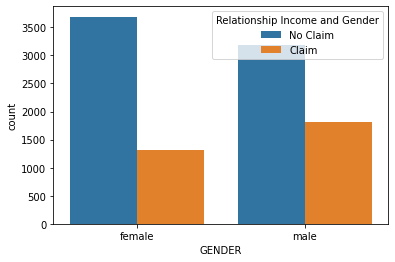

In [19]:
dfgender = data.groupby(['GENDER'])['OUTCOME'].value_counts()

sns.countplot(data=data, x='GENDER', hue='OUTCOME')
img2= plt.legend(title='Relationship Income and Gender', loc='upper right', labels=['No Claim', 'Claim'])
plt.show(img2)

In [20]:
dfgender.to_frame()

OUTCOME
GENDER OUTCOME         
female 0           3689
       1           1321
male   0           3178
       1           1812

According to the table, MALE are the most likely to claimed_loan than FEMALE.

Relationship Income and OUTCOME:

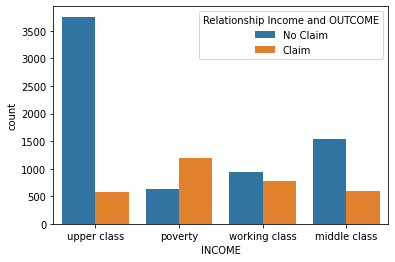

In [21]:
img3=sns.countplot(data=data, x='INCOME', hue='OUTCOME')
plt.legend(title='Relationship Income and OUTCOME', loc='upper right', labels=['No Claim', 'Claim'])
plt.show(img3)

In [22]:
dfincome = data.groupby(['INCOME'])['OUTCOME'].value_counts()
dfincome.to_frame()

OUTCOME
INCOME        OUTCOME         
middle class  0           1546
              1            592
poverty       1           1186
              0            628
upper class   0           3757
              1            579
working class 0            936
              1            776

Relationship Between DRIVING_EXPERIENCE and OUTCOME:

In [23]:
data["DRIVING_EXPERIENCE"].replace({"0-9y": "Newbie", "10-19y": "Amateur","20-29y":"Advanced","30y+":"Expert"}, inplace=True)

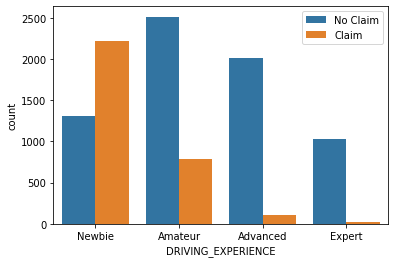

In [24]:
img4=sns.countplot(data=data, x='DRIVING_EXPERIENCE', hue='OUTCOME')
plt.legend( loc='upper right', labels=['No Claim', 'Claim'])
plt.show(img4)

In [25]:
dfdriving = data.groupby(['DRIVING_EXPERIENCE'])['OUTCOME'].value_counts()
dfdriving.to_frame()

OUTCOME
DRIVING_EXPERIENCE OUTCOME         
Advanced           0           2010
                   1            109
Amateur            0           2512
                   1            787
Expert             0           1032
                   1             20
Newbie             1           2217
                   0           1313

Newbie Driver and Amateur are more likely to have claimed_loan.

# Preprocessing

In [48]:
#missing data
data.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [49]:
#filling the missing values
data['ANNUAL_MILEAGE']=data['ANNUAL_MILEAGE'].fillna(int(np.mean(data['ANNUAL_MILEAGE'])))
data['CREDIT_SCORE']=data['CREDIT_SCORE'].fillna(int(np.mean(data['CREDIT_SCORE'])))

In [50]:
#check the missing value
data.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [51]:
data.head(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [58]:
data.columns

Index(['ID', 'RACE', 'EDUCATION', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME',
       'middle class', 'poverty', 'upper class', 'working class', '0-9y',
       '10-19y', '20-29y', '30y+', 'female', 'male', 'after 2015',
       'before 2015', '16-25', '26-39', '40-64', '65+'],
      dtype='object')

In [52]:

income_dummies = pd.get_dummies(data['INCOME'] )
# Drop column as it is now encoded
data = data.drop('INCOME',axis = 1)
data= data.join(income_dummies)


In [53]:
driving_dummies = pd.get_dummies(data['DRIVING_EXPERIENCE'] )
# Drop column as it is now encoded
data = data.drop('DRIVING_EXPERIENCE',axis = 1)
data= data.join(driving_dummies)

In [54]:
gender_dummies = pd.get_dummies(data['GENDER'] )
# Drop column as it is now encoded
data = data.drop('GENDER',axis = 1)
data= data.join(gender_dummies)

In [55]:
year_dummies = pd.get_dummies(data['VEHICLE_YEAR'] )
# Drop column as it is now encoded
data = data.drop('VEHICLE_YEAR',axis = 1)
data= data.join(year_dummies)

In [56]:
age_dummies = pd.get_dummies(data['AGE'] )
# Drop column as it is now encoded
data = data.drop('AGE',axis = 1)
data= data.join(age_dummies)

In [60]:
type_dummies = pd.get_dummies(data['VEHICLE_TYPE'] )
# Drop column as it is now encoded
data = data.drop('VEHICLE_TYPE',axis = 1)
data= data.join(type_dummies)

In [61]:
data.dtypes

ID                       int64
RACE                    object
EDUCATION               object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
MARRIED                  int64
CHILDREN                 int64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                  int64
middle class             uint8
poverty                  uint8
upper class              uint8
working class            uint8
0-9y                     uint8
10-19y                   uint8
20-29y                   uint8
30y+                     uint8
female                   uint8
male                     uint8
after 2015               uint8
before 2015              uint8
16-25                    uint8
26-39                    uint8
40-64                    uint8
65+                      uint8
sedan                    uint8
sports car               uint8
dtype: object

In [62]:
#splitting data
X = data.drop(['OUTCOME','ID','RACE','EDUCATION'], axis=1)
y = data['OUTCOME']

In [63]:
# Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Creating StandardScaler instance
sc = StandardScaler()

# Fitting Standard Scaller
X_train = sc.fit_transform(X_train)

# Scaling data
X_test = sc.transform(X_test)

#Logistic Regression

In [118]:
LR = LogisticRegression()
logistic_model = LR.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test) 
confusion_LR = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1367
           1       0.78      0.70      0.74       633

    accuracy                           0.84      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.84      0.84      0.84      2000

Accuracy Score:  0.8415


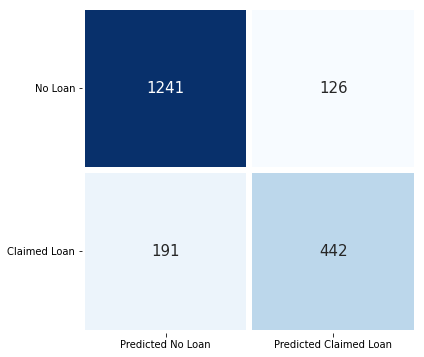

In [119]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_LR, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

In [120]:
#accuracy
accuracies = {}
acc = accuracy_score(y_test, y_pred)*100
accuracies['Logistic Regression'] = acc

#KNeighbors

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1367
           1       0.74      0.62      0.68       633

    accuracy                           0.81      2000
   macro avg       0.79      0.76      0.77      2000
weighted avg       0.81      0.81      0.81      2000

Accuracy Score:  0.812


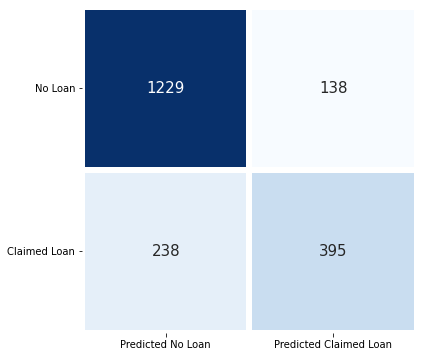

In [121]:
#Fitting KNeighborsClassifier Model
KN = KNeighborsClassifier( n_neighbors= 5)
KN_model = KN.fit(X_train, y_train)
y_pred = KN_model.predict(X_test)
confusion_kn = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_kn, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

In [122]:
#Elbow method to find the best n_neighbors

error_rate = []
# Will take some time
for i in range(1,20):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)

 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

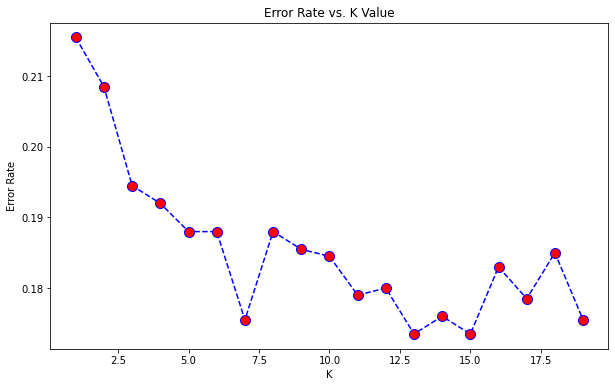

In [123]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1367
           1       0.77      0.64      0.70       633

    accuracy                           0.83      2000
   macro avg       0.81      0.78      0.79      2000
weighted avg       0.82      0.83      0.82      2000

Accuracy Score:  0.8265


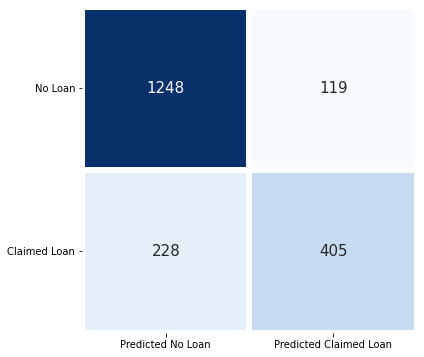

In [124]:
KN = KNeighborsClassifier( n_neighbors=15)
KN_model = KN.fit(X_train, y_train)
y_pred = KN_model.predict(X_test)
confusion_kn = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_kn, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

In [125]:
#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['KNeighbors'] = acc

#decision tree

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1367
           1       0.68      0.64      0.66       633

    accuracy                           0.79      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.79      0.79      0.79      2000

Accuracy Score:  0.7885


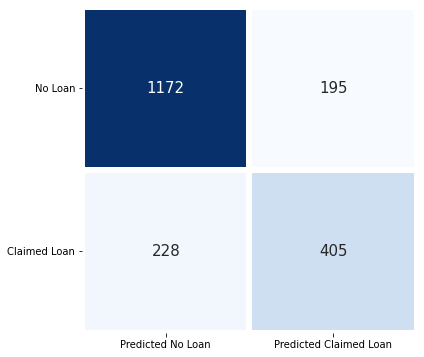

In [126]:
#Fitting DecisionTreeClassifier Model
DTree = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
tree_model = DTree.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()


In [127]:
#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['DecisionTree'] = acc

#random forest

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1367
           1       0.77      0.66      0.71       633

    accuracy                           0.83      2000
   macro avg       0.81      0.78      0.79      2000
weighted avg       0.83      0.83      0.83      2000

Accuracy Score:  0.83


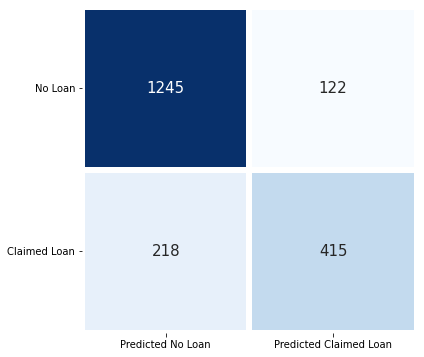

In [128]:
#Fitting RandomForestClassifier Model
RF = RandomForestClassifier(criterion= 'entropy', n_estimators= 150, random_state= 0)
random_model = RF.fit(X_train, y_train)
y_pred = random_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

In [129]:
#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['RandomForest'] = acc


#gradient boost

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1367
           1       0.79      0.73      0.76       633

    accuracy                           0.85      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.85      0.85      0.85      2000

Accuracy Score:  0.852


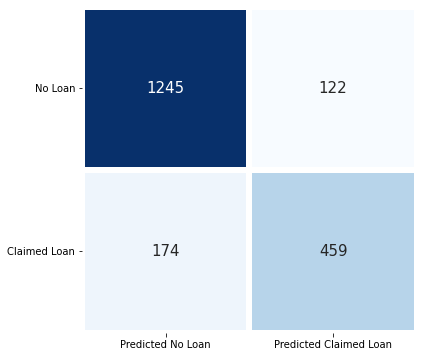

In [130]:
#Fitting GradientBoostingClassifier Model
GB= GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, loss= 'exponential', n_estimators= 100, random_state= 0)
gradient_model = GB.fit(X_train, y_train)
y_pred = gradient_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

In [131]:
#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['GradientBoosting'] = acc

#XGBoost

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1367
           1       0.79      0.69      0.74       633

    accuracy                           0.84      2000
   macro avg       0.83      0.80      0.81      2000
weighted avg       0.84      0.84      0.84      2000

Accuracy Score:  0.844


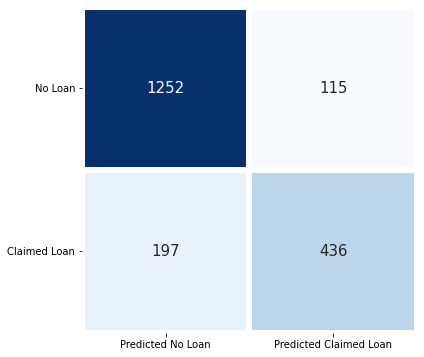

In [132]:
#Fitting XGBClassifier Model
XGB = XGBClassifier(eval_metric= 'error', learning_rate= 0.05)
xgb_model = XGB.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

In [133]:
#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['XGBoost'] = acc

#Comparing Models

In [134]:
df_tuned = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_tuned.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_tuned

,Model,Accuracy
4,GradientBoosting,85.20
5,XGBoost,84.40
0,Logistic Regression,84.15
3,RandomForest,83.00
1,KNeighbors,82.65
2,DecisionTree,78.85


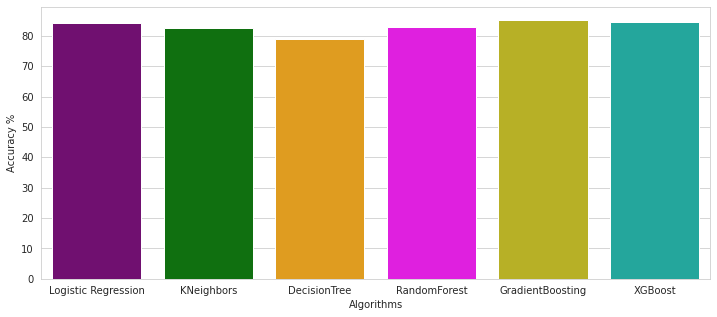

In [136]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()